In [37]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabaz_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline  

In [56]:
import pandas as pd
from sklearn import preprocessing
df = pd.read_pickle('AgeSexRace.pkl')
df.columns

Index(['FIPS', 'city_town', 'p_malepop', 'p_ageless5', 'p_age5to9',
       'p_age10to14', 'p_age15to19', 'p_age20to24', 'p_age25to34',
       'p_age35to44', 'p_age45to54', 'p_age55to59', 'p_age60to64',
       'p_age65to74', 'p_age75to84', 'p_ageover85', 'p_white', 'p_black',
       'p_amind', 'p_asian', 'p_asian_ind', 'p_as_chin', 'p_as_filip',
       'p_as_jap', 'p_as_korean', 'p_as_viet', 'p_as_other', 'p_2_races',
       'p_latino', 'p_mexican', 'p_puerto_rico', 'p_cuban', 'p_other_lat'],
      dtype='object')

In [57]:
df = df.query('p_malepop != 0')
X = df.iloc[:,2:].values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 2 to 570
Data columns (total 33 columns):
FIPS             565 non-null object
city_town        565 non-null object
p_malepop        565 non-null float64
p_ageless5       565 non-null float64
p_age5to9        565 non-null float64
p_age10to14      565 non-null float64
p_age15to19      565 non-null float64
p_age20to24      565 non-null float64
p_age25to34      565 non-null float64
p_age35to44      565 non-null float64
p_age45to54      565 non-null float64
p_age55to59      565 non-null float64
p_age60to64      565 non-null float64
p_age65to74      565 non-null float64
p_age75to84      565 non-null float64
p_ageover85      565 non-null float64
p_white          565 non-null float64
p_black          565 non-null float64
p_amind          565 non-null float64
p_asian          565 non-null float64
p_asian_ind      565 non-null float64
p_as_chin        565 non-null float64
p_as_filip       565 non-null float64
p_as_jap         565 no

In [52]:
### select a specific set of columns to cluster on
df2 = pd.concat([df['p_malepop'],df['p_white'], df['p_latino']], axis=1)

df2.head()

,p_malepop,p_white,p_latino
2,49.0,81.1,10.3
3,48.3,35.0,25.1
4,49.3,90.2,8.0
5,51.3,76.9,31.2
6,51.4,74.8,12.6


In [53]:
#X = df.iloc[:,2:].values
X = df2.values

#X = preprocessing.scale(X)
type(X)

numpy.ndarray

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.498332317116 
The Calinski Harabasz score is : 352.762568668


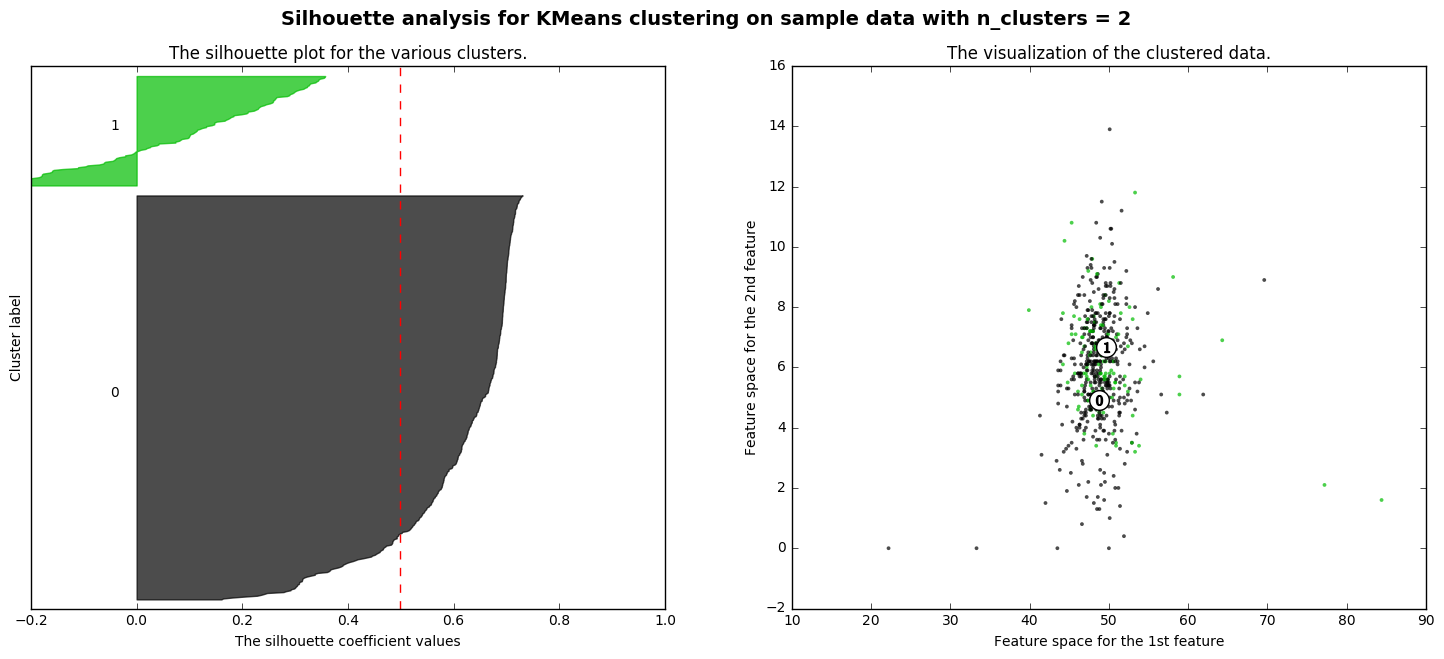

For n_clusters = 3 The average silhouette_score is : 0.501844868018 
The Calinski Harabasz score is : 262.997873909


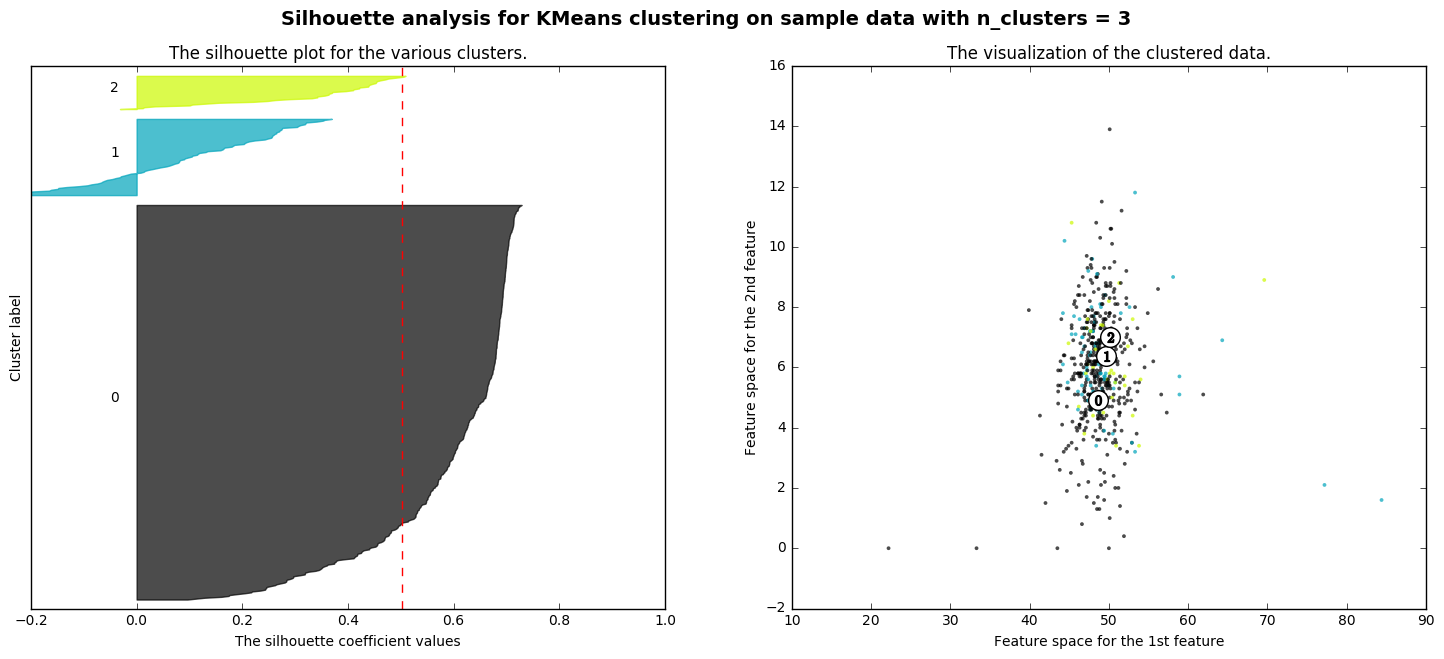

For n_clusters = 4 The average silhouette_score is : 0.357099981114 
The Calinski Harabasz score is : 256.433861821


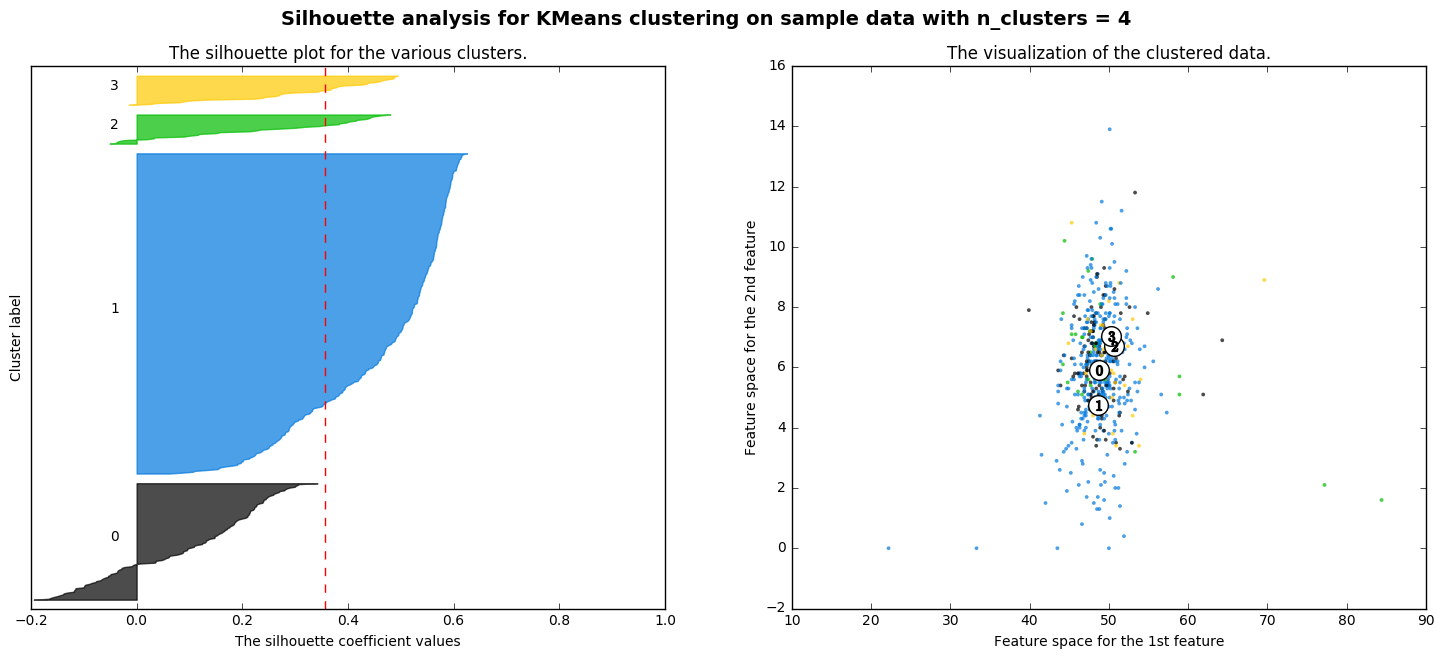

For n_clusters = 5 The average silhouette_score is : 0.285675381861 
The Calinski Harabasz score is : 239.177778888


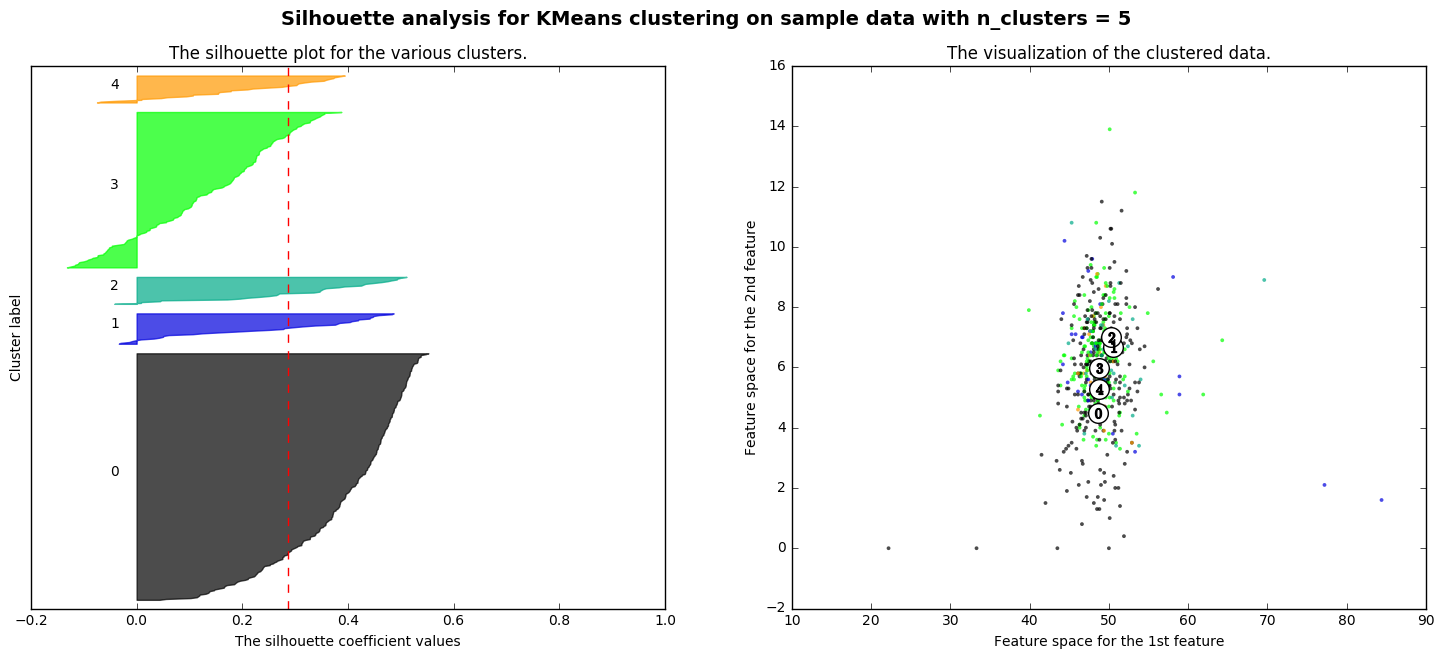

For n_clusters = 6 The average silhouette_score is : 0.258862260587 
The Calinski Harabasz score is : 224.123583901


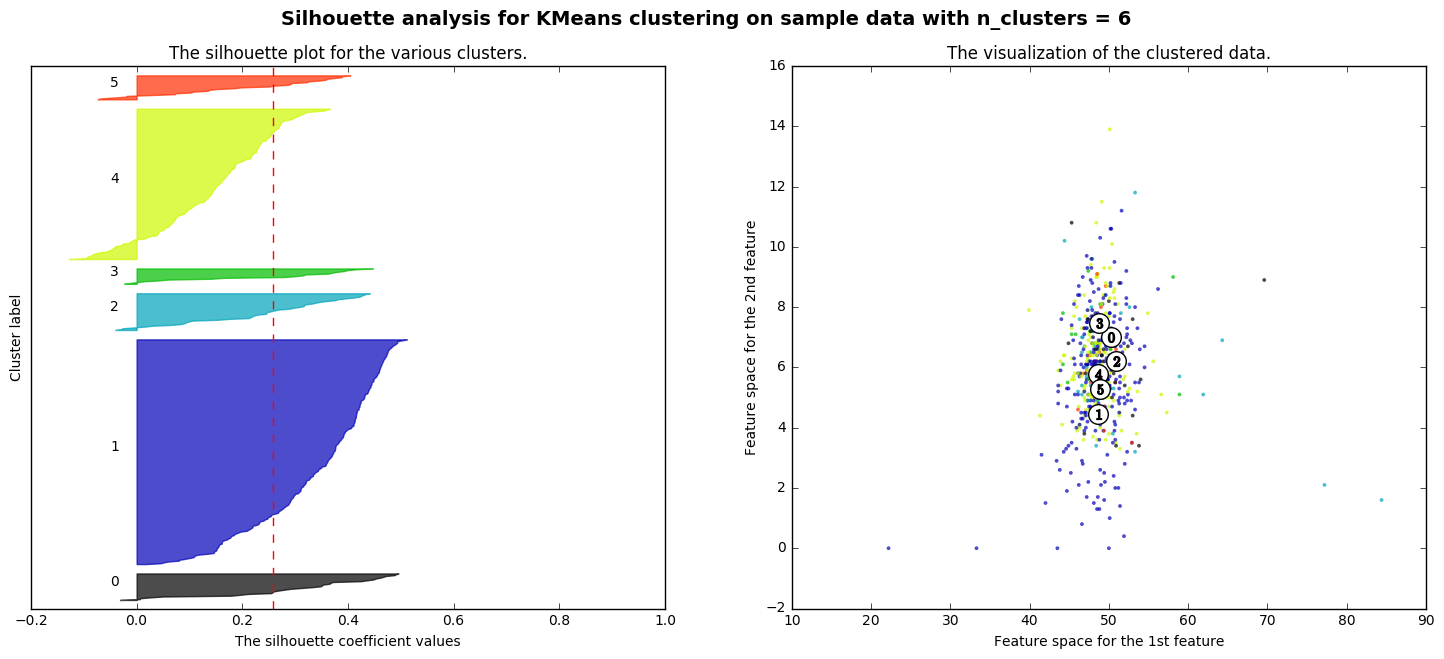

For n_clusters = 7 The average silhouette_score is : 0.264156524184 
The Calinski Harabasz score is : 208.680138872


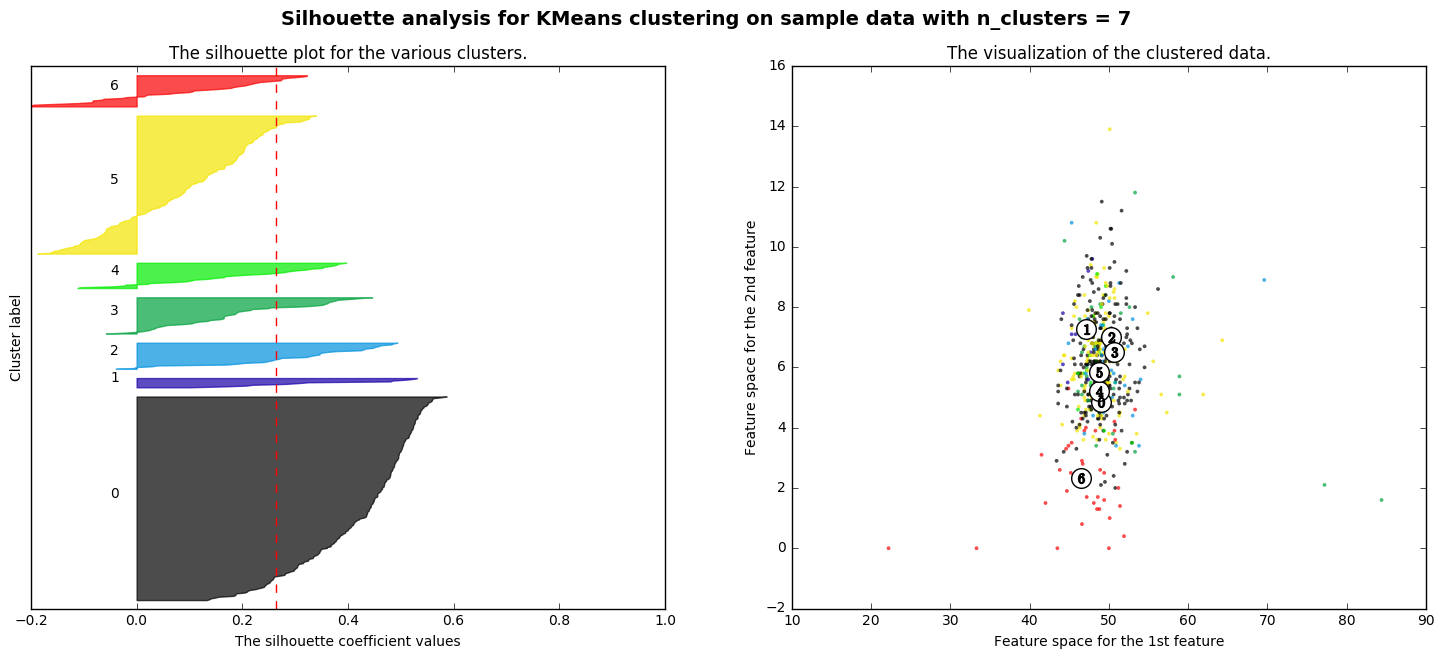

For n_clusters = 8 The average silhouette_score is : 0.25027896984 
The Calinski Harabasz score is : 199.21419633


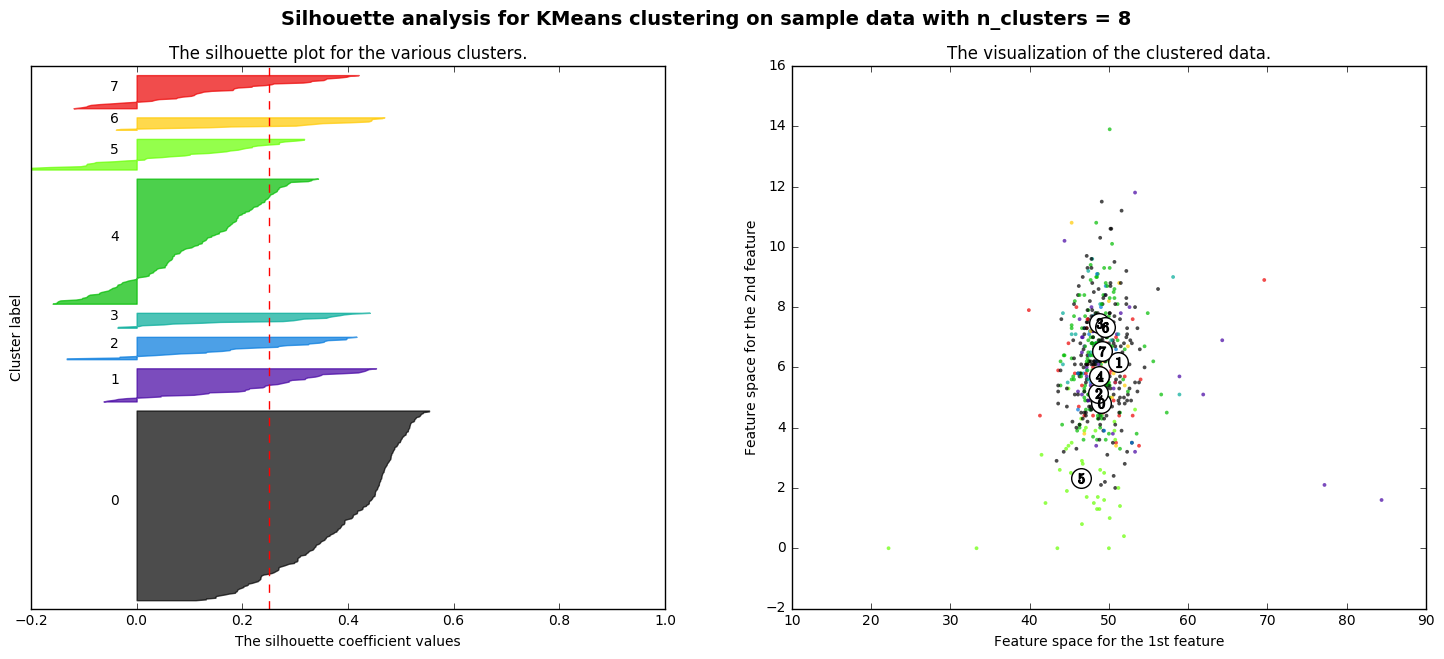

For n_clusters = 9 The average silhouette_score is : 0.251609134906 
The Calinski Harabasz score is : 190.57581215


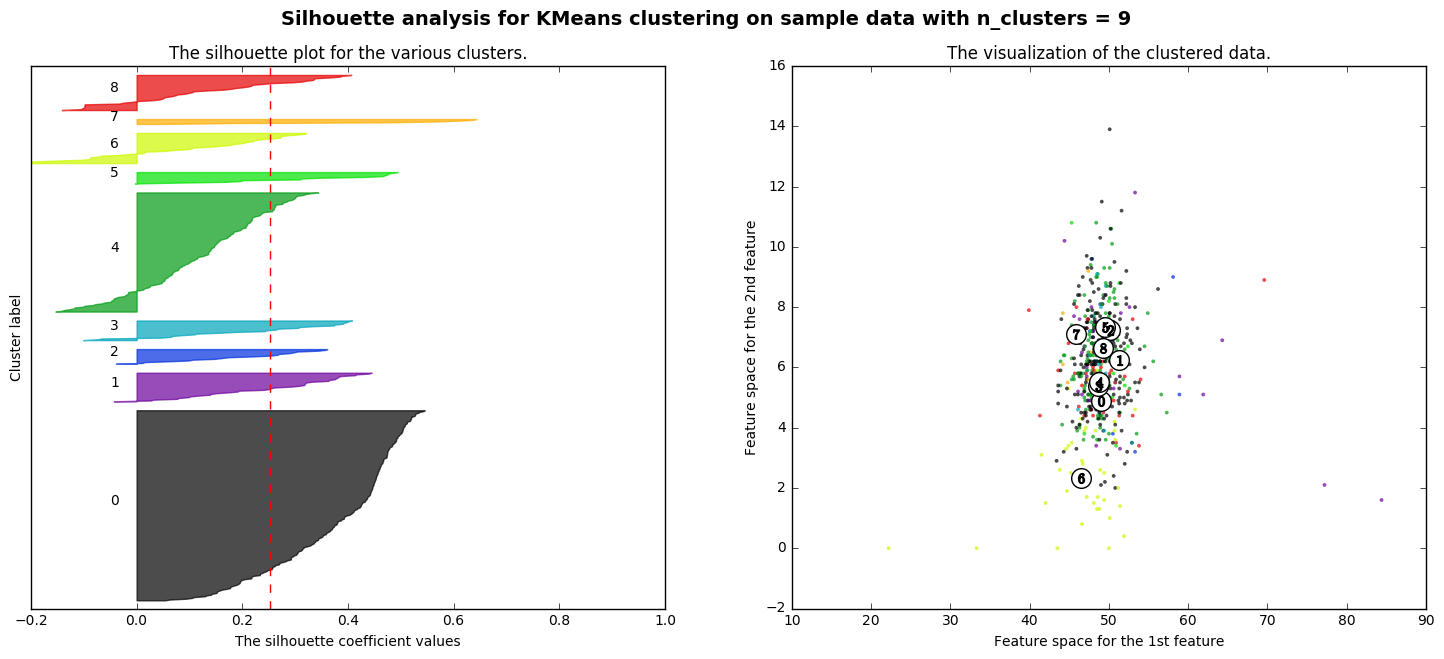

For n_clusters = 10 The average silhouette_score is : 0.2581838403 
The Calinski Harabasz score is : 183.000018958


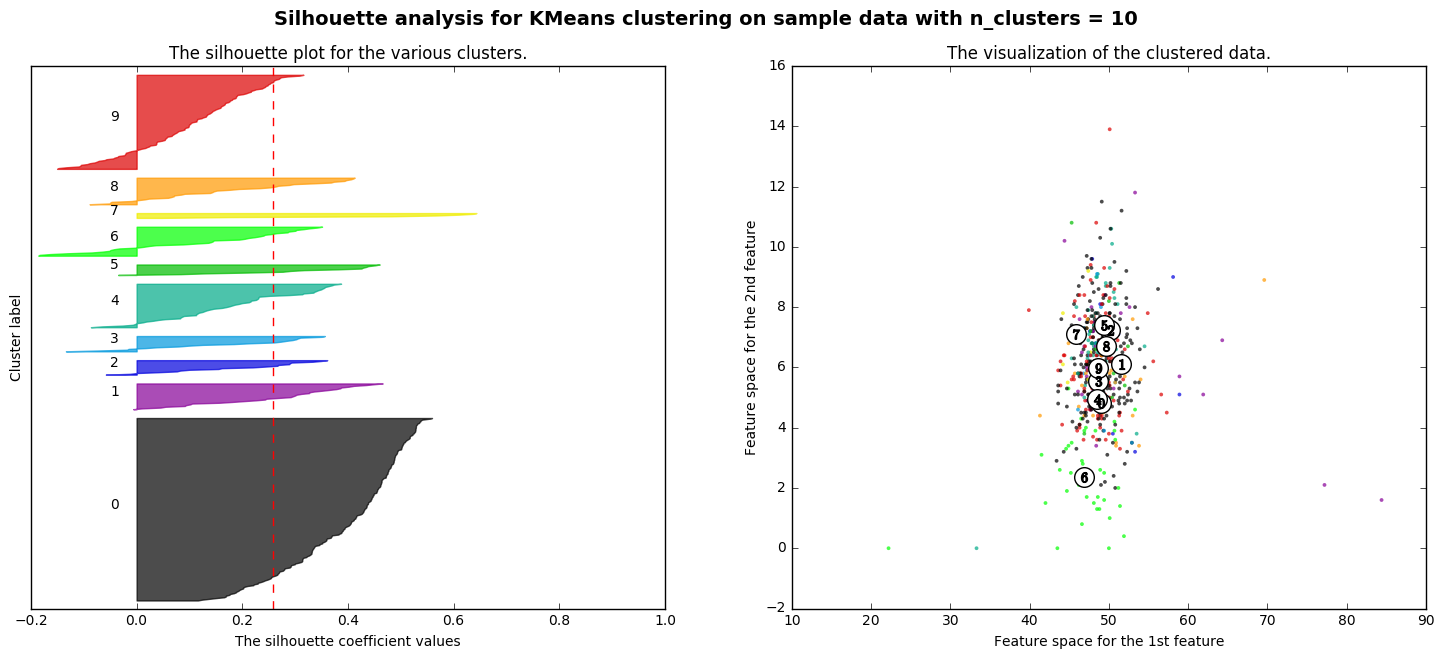

In [58]:
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    ch_score = calinski_harabaz_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg,
         "\nThe Calinski Harabasz score is :", ch_score)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
       # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    
    

In [59]:
for i in zip(df['city_town'],cluster_labels):
    print(i)

('Absecon city, Atlantic County, New Jersey', 9)
('Atlantic City city, Atlantic County, New Jersey', 2)
('Brigantine city, Atlantic County, New Jersey', 0)
('Buena borough, Atlantic County, New Jersey', 9)
('Buena Vista township, Atlantic County, New Jersey', 9)
('Corbin City city, Atlantic County, New Jersey', 0)
('Egg Harbor township, Atlantic County, New Jersey', 9)
('Egg Harbor City city, Atlantic County, New Jersey', 1)
('Estell Manor city, Atlantic County, New Jersey', 0)
('Folsom borough, Atlantic County, New Jersey', 9)
('Galloway township, Atlantic County, New Jersey', 9)
('Hamilton township, Atlantic County, New Jersey', 1)
('Hammonton town, Atlantic County, New Jersey', 9)
('Linwood city, Atlantic County, New Jersey', 0)
('Longport borough, Atlantic County, New Jersey', 6)
('Margate City city, Atlantic County, New Jersey', 6)
('Mullica township, Atlantic County, New Jersey', 9)
('Northfield city, Atlantic County, New Jersey', 0)
('Pleasantville city, Atlantic County, New Jer